In [ ]:
import numpy as np
import os
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from keras import layers
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
myFile = "/content/drive/MyDrive/data"
fullPath = os.path.abspath("/content/drive/MyDrive/data")
data_for_processing = tf.keras.utils.get_file( fname= myFile,origin='file://'+fullPath)


In [ ]:
img_height,img_width=180,180
batch_size=32
number_classes = 2

In [ ]:
# Spliting our data set for training and test

# We split our data_for_processing and take 80% of available data and put it in train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,                          #               
  validation_split=0.3,                         # Optional float between 0 and 1, fraction of data to reserve for validation.  
  subset="training",                            # One of "training" or "validation". Only used if validation_split is set.
  seed=123,                                     # Optional random seed for shuffling and transformations.
  image_size=(img_height, img_width),           # Size to resize images to after they are read from disk. Defaults to (256, 256)
  batch_size=batch_size)                        # Size of the batches of data. Default: 32. If None, the data will not be batched

# We split our data_for_processing and take 20% of available data and put it in val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.
Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [ ]:
class_names = train_ds.class_names

print(class_names)

['with_mask', 'without_mask']


In [ ]:
vgg16_model = Sequential()
pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height,img_width,3),
    pooling='avg',
    classes=number_classes,
)
for layer in pretrained_model.layers:
        layer.trainable=False
vgg16_model.add(pretrained_model)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg16_model.add(layers.Flatten())

vgg16_model.add(layers.Dense(512, activation='relu'))




vgg16_model.add(layers.Dense(number_classes, activation='softmax'))


vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = vgg16_model.fit(train_ds, validation_data= val_ds, epochs=5)

Epoch 1/5
166/166 [==============================] - 2331s 14s/step - loss: 0.3048 - accuracy: 0.9588 - val_loss: 0.1052 - val_accuracy: 0.9815
Epoch 2/5
166/166 [==============================] - 2304s 14s/step - loss: 0.0781 - accuracy: 0.9843 - val_loss: 0.0946 - val_accuracy: 0.9819
Epoch 3/5
166/166 [==============================] - 2379s 14s/step - loss: 0.0196 - accuracy: 0.9945 - val_loss: 0.0827 - val_accuracy: 0.9859
Epoch 4/5
166/166 [==============================] - 2379s 14s/step - loss: 0.0134 - accuracy: 0.9966 - val_loss: 0.0926 - val_accuracy: 0.9797
Epoch 5/5
166/166 [==============================] - 2430s 15s/step - loss: 0.0218 - accuracy: 0.9945 - val_loss: 0.0825 - val_accuracy: 0.9837


In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

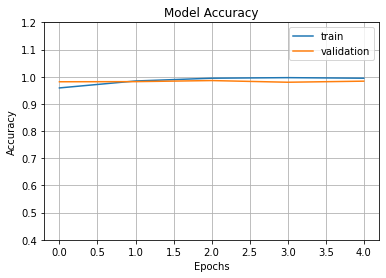

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#vgg16_model.save_weights("my_vgg16_model_weights.h5")
vgg16_model.save("my_vgg16_model.h5")